# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

**1.Why are you choosing this dataset?**

Ans:I chose this data because its interesting to see what makes songs popular. We can learn a lot about what people like in music nowadays.

2.What variables will you use? **bold text**

Ans:
a.Music Style: This is the type of music for each song, like rock or pop. We're looking at this to see what kinds of music people like the most.

b.Popularity: This is a number that shows how much people like each song. We want to find out what makes a song popular.

c.Danceable: This tells us if a song is good for dancing. We're going to check if songs that are easier to dance to are more popular.

d.Energy: This shows if the song is fast and loud or slow and quiet. We'll look at whether louder and faster songs are liked more.

e.Acoustic: This tells us if the song sounds more like live music or if it's more electronic. We'll see if people prefer songs that sound more live or more electronic.

**3.What analysis(es) will you run?**

Ans:I am planning to do below steps for my analysis:
Exploratory Analysis: Look at song features like danceability, energy, and genres to understand the data.

Feature Correlation: Check how different song features relate to each other and to song popularity.

Predictions with Machine Learning:

Random Forest & Decision Tree: Predict song popularity or genre based on features.
XGBoost: Apply an advanced model for possibly better predictions.
K-Means Clustering: Group songs into clusters based on their features to find patterns.
Evaluate Models: Check how well each machine learning model performed.

**4.Do you have any hypotheses? What are they?**

Ans:Happier Songs Are More Popular: I think that happier-sounding songs are liked more by people. I will check if songs with higher happiness levels are more popular in my analysis.

In [9]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [10]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [11]:
# Install findspark
!python -m pip install -q findspark

In [12]:
import findspark
findspark.init()

In [13]:
from pyspark.sql import SparkSession

In [14]:
APP_NAME = "Final Project"

In [15]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [16]:
spark

# Reading File From GCS Bucket

In [17]:
# Authenticate.
from google.colab import auth
auth.authenticate_user()

# Install Cloud Storage FUSE.
!echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!apt -qq update && apt -qq install gcsfuse

deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2659  100  2659    0     0  14359      0 --:--:-- --:--:-- --:--:-- 14295
OK
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: https://packages.cloud.google.com/apt/dists/gcsfuse-jammy/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
gcsfuse is already the newest version (2.0.0).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [18]:
# Mount a Cloud Storage bucket or location, without the gs:// prefix.
bucket_name = 'dsci632-final-project'
local_path = f"/content/gcs/{bucket_name}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {bucket_name} {local_path}

{"time":"16/03/2024 11:27:39.337850","severity":"INFO","message":"Start gcsfuse/2.0.0 (Go version go1.22.1) for app \"\" using mount point: /content/gcs/dsci632-final-project\n"}
{"time":"16/03/2024 11:27:39.338206","severity":"INFO","message":"GCSFuse mount command flags: {\"AppName\":\"\",\"Foreground\":false,\"ConfigFile\":\"\",\"MountOptions\":{},\"DirMode\":493,\"FileMode\":420,\"Uid\":-1,\"Gid\":-1,\"ImplicitDirs\":true,\"OnlyDir\":\"\",\"RenameDirLimit\":0,\"CustomEndpoint\":null,\"BillingProject\":\"\",\"KeyFile\":\"\",\"TokenUrl\":\"\",\"ReuseTokenFromUrl\":true,\"EgressBandwidthLimitBytesPerSecond\":-1,\"OpRateLimitHz\":-1,\"SequentialReadSizeMb\":200,\"MaxRetrySleep\":30000000000,\"StatCacheCapacity\":20460,\"StatCacheTTL\":60000000000,\"TypeCacheTTL\":60000000000,\"HttpClientTimeout\":0,\"MaxRetryDuration\":-1000000000,\"RetryMultiplier\":2,\"LocalFileCache\":false,\"TempDir\":\"\",\"ClientProtocol\":\"http1\",\"MaxConnsPerHost\":100,\"MaxIdleConnsPerHost\":100,\"EnableNone

In [19]:
!ls -lh /content/gcs/

total 0
drwxr-xr-x 1 root root 0 Mar 16 23:27 dsci632-final-project


In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# Read the CSV file directly from GCS

file_path = "/content/gcs/dsci632-final-project/spotify.csv"
spotify_df= spark.read.csv(file_path, header=True, inferSchema=True)


# Show the resulting DataFrame
spotify_df.show()


+------------+--------------------+------------------+-----------+-------+--------+--------------------+----------------+---+--------+-------------------+----+--------------------+----------+------------+--------------------+-----------------+-------------------+----+
|acousticness|             artists|      danceability|duration_ms| energy|explicit|                  id|instrumentalness|key|liveness|           loudness|mode|                name|popularity|release_date|         speechiness|            tempo|            valence|year|
+------------+--------------------+------------------+-----------+-------+--------+--------------------+----------------+---+--------+-------------------+----+--------------------+----------+------------+--------------------+-----------------+-------------------+----+
|       0.995| ['Carl Woitschach']|             0.708|     158648|  0.195|       0|6KbQ3uYMLKb5jDxLF...|           0.563| 10|   0.151|            -12.428|   1|Singende Bataillo...|         0|  

#Schema of the Dataset:

In [21]:
spotify_df.printSchema()


root
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- explicit: string (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- year: string (nullable = true)



#Explanation of Relevant Features:

1. acousticness: How acoustic a song is.

2. artists: Who performed the song.

3. danceability: If a song is good for dancing.

4. duration_ms: Length of the song.

5. energy: How intense a song is.

6. explicit: If the song has explicit lyrics.

7. id: Song's unique Spotify ID.

8. instrumentalness: If the song has no vocals.

9. key: Musical key of the song.

10. liveness: If the recording was live.

11. loudness: Volume of the song.

12. mode: Major or minor scale.

13. name: Title of the song.

14. popularity: Song's popularity on Spotify.

15. release_date: When the song was released.

16. speechiness: Presence of spoken words.

17. tempo: Speed of the song (BPM).

18. valence: Musical mood positivity.

19. year: Year the song was released.

#Histograms of Relevant Features:

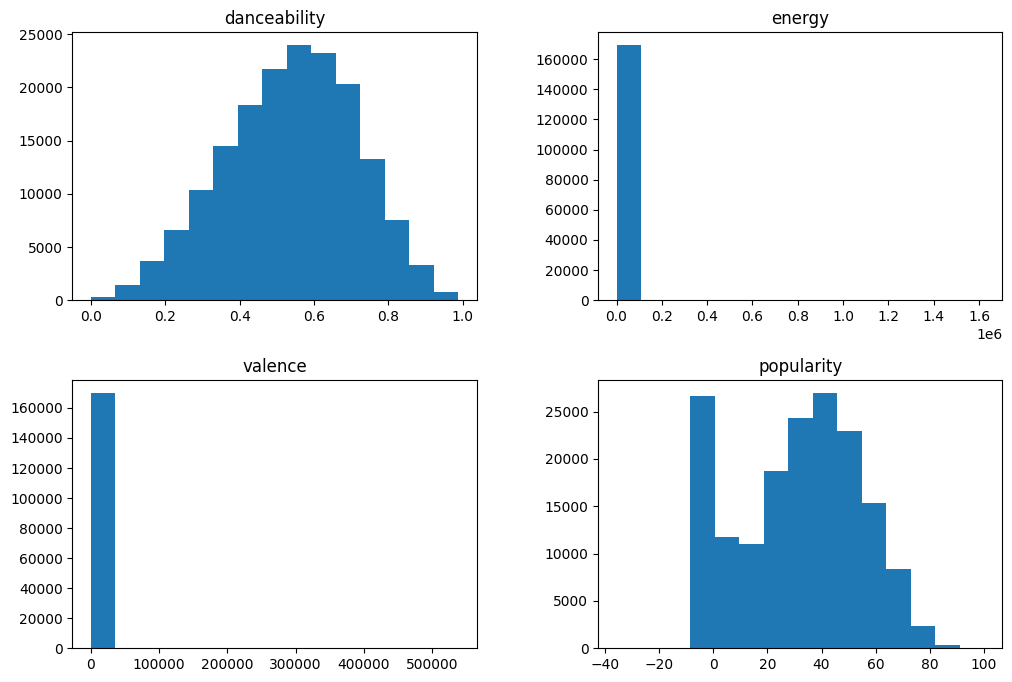

In [22]:
from pyspark.sql.types import FloatType

df = spotify_df.withColumn("danceability", spotify_df["danceability"].cast(FloatType())) \
       .withColumn("energy", spotify_df["energy"].cast(FloatType())) \
       .withColumn("valence",spotify_df["valence"].cast(FloatType())) \
       .withColumn("popularity", spotify_df["popularity"].cast(FloatType()))
# Assuming you have already installed Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
pandas_df = df.select("danceability", "energy", "valence", "popularity").toPandas()

# Plotting
pandas_df.hist(figsize=[12, 8], bins=15, grid=False)
plt.show()



#Use Spark SQL or built-in methods to show a range of values

In [23]:
# Create a temporary view
df.createOrReplaceTempView("spotify_data")

# Query the range of numerical values using Spark SQL
spark.sql("""
    SELECT
        MIN(danceability) AS min_danceability,
        MAX(danceability) AS max_danceability,
        MIN(energy) AS min_energy,
        MAX(energy) AS max_energy,
        MIN(valence) AS min_valence,
        MAX(valence) AS max_valence,
        MIN(tempo) AS min_tempo,
        MAX(tempo) AS max_tempo,
        MIN(popularity) AS min_popularity,
        MAX(popularity) AS max_popularity
    FROM spotify_data
""").show()


+----------------+----------------+----------+----------+-----------+-----------+-----------------+--------------------+--------------+--------------+
|min_danceability|max_danceability|min_energy|max_energy|min_valence|max_valence|        min_tempo|           max_tempo|min_popularity|max_popularity|
+----------------+----------------+----------+----------+-----------+-----------+-----------------+--------------------+--------------+--------------+
|             0.0|           0.988|       0.0| 1622000.0|        0.0|   538760.0| 'José Feliciano'|When Your Lover H...|        -35.69|         100.0|
+----------------+----------------+----------+----------+-----------+-----------+-----------------+--------------------+--------------+--------------+



#Most common words/n-grams found

In [24]:
from pyspark.ml.feature import Tokenizer

# Create a new Tokenizer object
tokenizer = Tokenizer(inputCol="name", outputCol="words")
tokenized_df = tokenizer.transform(df)
from pyspark.ml.feature import StopWordsRemover

# Create a new StopWordsRemover object
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
filtered_df = remover.transform(tokenized_df)
from pyspark.ml.feature import NGram

# Create a new NGram object
ngram = NGram(n=2, inputCol="filtered_words", outputCol="ngrams")
ngram_df = ngram.transform(filtered_df)
from pyspark.sql.functions import explode, col

# Explode the ngrams into a new row for each and count occurrences
ngram_counts = ngram_df.withColumn("ngram", explode("ngrams")) \
    .groupBy("ngram") \
    .count() \
    .orderBy(col("count").desc())

# Show the most common ngrams
ngram_counts.show()



+--------------------+-----+
|               ngram|count|
+--------------------+-----+
|        - remastered| 3790|
|              - live| 3682|
|     - remasterizado| 2238|
|      - instrumental| 1101|
|          major, op.| 1064|
|          minor, op.|  917|
|            - single|  913|
|      single version|  855|
|             & часть|  767|
|               no. 2|  674|
|instrumental (rem...|  667|
|               no. 1|  641|
|              - take|  596|
|              love -|  572|
|      - триумфальная|  536|
|   триумфальная арка|  536|
|          sonata no.|  513|
|              - 2015|  484|
|               no. 3|  479|
|       2015 remaster|  471|
+--------------------+-----+
only showing top 20 rows



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

#Count Rows Before Cleaning:


In [25]:
original_count = df.count()
print(f"Original row count: {original_count}")



Original row count: 169909


# Remove Null or Incorrect Values:

In [26]:
# Remove rows with any null values
spotify_clean = df.dropna()
clean_count = spotify_clean.count()
print(f"Row count after cleaning: {clean_count}")


Row count after cleaning: 168462


#Renaming a Column:

In [27]:
spotify_clean = spotify_clean.withColumnRenamed('duration_ms', 'duration_milliseconds') \
       .withColumnRenamed('popularity', 'popularity_score') \
       .withColumnRenamed('id', 'track_id') \
       .withColumnRenamed('key', 'musical_key') \
       .withColumnRenamed('name', 'song_title') \
       .withColumnRenamed('artists', 'performing_artists')
spotify_clean.printSchema()


root
 |-- acousticness: double (nullable = true)
 |-- performing_artists: string (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_milliseconds: string (nullable = true)
 |-- energy: float (nullable = true)
 |-- explicit: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- musical_key: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- song_title: string (nullable = true)
 |-- popularity_score: float (nullable = true)
 |-- release_date: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: float (nullable = true)
 |-- year: string (nullable = true)



#Adding a New Column:
##new column indicating whether a song is longer than 3 minutes

In [28]:
from pyspark.sql.functions import col

spotify_df = spotify_clean.withColumn('is_long_track', col('duration_milliseconds') > 180000)
spotify_df.printSchema()


root
 |-- acousticness: double (nullable = true)
 |-- performing_artists: string (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_milliseconds: string (nullable = true)
 |-- energy: float (nullable = true)
 |-- explicit: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- musical_key: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- song_title: string (nullable = true)
 |-- popularity_score: float (nullable = true)
 |-- release_date: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: float (nullable = true)
 |-- year: string (nullable = true)
 |-- is_long_track: boolean (nullable = true)



#Cast the columns that are incorrectly typed as strings

In [29]:
from pyspark.sql.types import DoubleType, IntegerType

# Casting columns from string to double where appropriate
double_type_columns = ['danceability', 'energy', 'instrumentalness',
                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
for column in double_type_columns:
    spotify_df = spotify_df.withColumn(column, spotify_df[column].cast(DoubleType()))

# Casting 'duration_milliseconds' and 'popularity_score' to integers
spotify_df = spotify_df.withColumn('duration_milliseconds', spotify_df['duration_milliseconds'].cast(IntegerType())) \
                       .withColumn('popularity_score', spotify_df['popularity_score'].cast(IntegerType()))

# Casting 'year' to integer
spotify_df = spotify_df.withColumn('year', spotify_df['year'].cast(IntegerType()))
spotify_df.printSchema()

root
 |-- acousticness: double (nullable = true)
 |-- performing_artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_milliseconds: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: string (nullable = true)
 |-- track_id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- musical_key: string (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: string (nullable = true)
 |-- song_title: string (nullable = true)
 |-- popularity_score: integer (nullable = true)
 |-- release_date: string (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- is_long_track: boolean (nullable = true)



In [31]:
from pyspark.sql.functions import lower, regexp_replace

# Update the regular expression to keep alphanumeric characters, spaces, and the '@' symbol
# while converting text to lower case for 'performing_artists' and 'song_title'
spotify_df = spotify_df.withColumn('performing_artists', lower(regexp_replace('performing_artists', '[^a-zA-Z0-9@\\s]', ''))) \
                       .withColumn('song_title', lower(regexp_replace('song_title', '[^a-zA-Z0-9@\\s]', '')))

spotify_df.head()

Row(acousticness=0.995, performing_artists='carl woitschach', danceability=0.7080000042915344, duration_milliseconds=158648, energy=0.19499999284744263, explicit='0', track_id='6KbQ3uYMLKb5jDxLF7wYDD', instrumentalness=0.563, musical_key='10', liveness=0.151, loudness=-12.428, mode='1', song_title='singende bataillone 1 teil', popularity_score=0, release_date='1928', speechiness=0.0506, tempo=118.469, valence=0.7789999842643738, year=1928, is_long_track=False)

#Remove or fix rows that have bad values/data.

In [32]:
from pyspark.sql.functions import col

# Example: Remove songs where 'energy' is less than 0 or greater than 1
spotify_df = spotify_df.filter((col('energy') >= 0) & (col('energy') <= 1))

# Example: Remove songs where 'duration_milliseconds' is negative
spotify_df = spotify_df.filter(col('duration_milliseconds') >= 0)
spotify_df.count()


168462

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

# Using a UDF to Add a New Column:

In [34]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the UDF
def classify_tempo(tempo):
    if tempo < 60:
        return 'Slow'
    elif tempo <= 120:
        return 'Medium'
    else:
        return 'Fast'

# Register the UDF
classify_tempo_udf = udf(classify_tempo, StringType())

# Apply the UDF to create a new 'tempo_category' column
spotify_df = spotify_df.withColumn('tempo_category', classify_tempo_udf(col('tempo')))




#Creating Feature Vectors:
##Combining relevant features into a single vector column simplifies the usage of PySpark's MLlib utilities and prepares the data for machine learning algorithms.

#One-hot Encoding Categorical Variables:

In [8]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, OneHotEncoder
from pyspark.sql.functions import col  # Importing col for data type conversion

# Initialize Spark Session
spark = SparkSession.builder.appName('SpotifyPopularityPrediction').getOrCreate()

# Load your data
df = spark.read.csv(file_path, header=True, inferSchema=True)  # Replace 'file_path' with the actual file path

# Convert all string-type numeric columns to float. This resolves issues related to unsupported data types.
numeric_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
                   'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'year']
for col_name in numeric_columns:
    df = df.withColumn(col_name, col(col_name).cast('float'))
df = df.withColumn('popularity', col('popularity').cast('float'))
df = df.dropna()
# Check the schema to ensure all columns are of correct data type
df.printSchema()

# Assuming 'key' is a categorical feature; if you don't have categorical features, you can remove StringIndexer and OneHotEncoder
indexer = StringIndexer(inputCol="key", outputCol="keyIndex").setHandleInvalid("skip")  # Adding error handling
encoder = OneHotEncoder(inputCols=["keyIndex"], outputCols=["keyVec"])

# Assembling numeric features and encoded categorical features into a single features vector
assembler = VectorAssembler(inputCols=numeric_columns + ['keyVec'], outputCol="rawFeatures")

# Apply StandardScaler to the assembled vector
scaler = StandardScaler(inputCol="rawFeatures", outputCol="features", withStd=True, withMean=False)

# Create a pipeline for feature transformation
featurePipeline = Pipeline(stages=[indexer, encoder, assembler, scaler])

# Apply the pipeline to transform the original data
processedData = featurePipeline.fit(df).transform(df)

# Now split the transformed data into training and testing sets
train_data_ml, test_data_ml = processedData.randomSplit([0.8, 0.2], seed=42)


NameError: name 'file_path' is not defined

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


root
 |-- acousticness: float (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration_ms: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- explicit: float (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- key: string (nullable = true)
 |-- liveness: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- mode: float (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: string (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- valence: float (nullable = true)
 |-- year: float (nullable = true)



In [7]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(featuresCol="features", labelCol="popularity", numTrees=100, seed=42)

# Train the model on the training data
rf_model = rf.fit(train_data_ml)

# Make predictions on the test data
rf_predictions = rf_model.transform(test_data_ml)

# Evaluate the model's performance
rf_evaluator = RegressionEvaluator(labelCol="popularity", predictionCol="prediction", metricName="rmse")
rf_rmse = rf_evaluator.evaluate(rf_predictions)
print(f'Random Forest RMSE: {rf_rmse}')

# You can also evaluate R² (Coefficient of Determination)
rf_evaluator.setMetricName("r2")
rf_r2 = rf_evaluator.evaluate(rf_predictions)
print(f'Random Forest R² score: {rf_r2}')


NameError: name 'train_data_ml' is not defined

In [68]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="popularity")

# Train the model on the training data
dt_model = dt.fit(train_data_ml)

# Make predictions on the test data
dt_predictions = dt_model.transform(test_data_ml)

# Evaluate the model's performance
dt_evaluator = RegressionEvaluator(labelCol="popularity", predictionCol="prediction", metricName="rmse")
dt_rmse = dt_evaluator.evaluate(dt_predictions)
print(f'Decision Tree RMSE: {dt_rmse}')

# You can also evaluate the R² (Coefficient of Determination)
dt_evaluator.setMetricName("r2")
dt_r2 = dt_evaluator.evaluate(dt_predictions)
print(f'Decision Tree R² score: {dt_r2}')


Decision Tree RMSE: 9.26058878013161
Decision Tree R² score: 0.8154459384136656


In [69]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="popularity")

# Train the model on the training data
lr_model = lr.fit(train_data_ml)

# Make predictions on the test data
lr_predictions = lr_model.transform(test_data_ml)

# Evaluate the model's performance
lr_evaluator = RegressionEvaluator(labelCol="popularity", predictionCol="prediction", metricName="rmse")
lr_rmse = lr_evaluator.evaluate(lr_predictions)
print(f'Linear Regression RMSE: {lr_rmse}')

# You can also evaluate the R² (Coefficient of Determination)
lr_evaluator.setMetricName("r2")
lr_r2 = lr_evaluator.evaluate(lr_predictions)
print(f'Linear Regression R² score: {lr_r2}')


Linear Regression RMSE: 10.034663911540207
Linear Regression R² score: 0.7833034131582594


In [6]:
train_data_ml.createOrReplaceTempView("music_tracks")
recommendations = spark.sql("""
    SELECT name, artists, danceability, energy, popularity
    FROM music_tracks
    WHERE danceability > 0.8 AND energy > 0.8
    ORDER BY popularity DESC
    LIMIT 10
""")

recommendations.show()


NameError: name 'train_data_ml' is not defined